<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/JingQian_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-31 21:22:28--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.113.221
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.113.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  17.0MB/s    in 13s     

2019-10-31 21:22:42 (15.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [5]:
import pandas as pd
aisles = pd.read_csv('aisles.csv')
aisles.head(4)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods


In [6]:
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_prior.head(4)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1


In [7]:
order_products_train = pd.read_csv('order_products__train.csv')
order_products_train.head(4)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0


In [8]:
orders = pd.read_csv('orders.csv')
orders.head(4)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0


In [9]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####
top_products_list=[
    'Banana',
    'Bag of Organic Bananas',
    'Organic Strawberries',
    'Organic Baby Spinach',
    'Organic Hass Avocado',
    'Organic Avocado',
    'Large Lemon',
    'Strawberries',
    'Limes',
    'Organic Whole Milk'
    ]

In [11]:
order_products = pd.concat([order_products_prior, order_products_train], axis = 0)
print(order_products.shape)
order_products.head(4)

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1


In [12]:
products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [13]:
merged = pd.merge(order_products, products, how='left', on = 'product_id')
merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [14]:
# create a subset of 10 most popular products
merged_subset10 = merged['product_name'].str.contains(top_products_list, regex=False)
merged_subset10.head(100)
# why contains didn't work????

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Name: product_name, Length: 100, dtype: float64

In [15]:
merged_subset10 = merged[merged['product_name'].isin(top_products_list)]
merged_subset10.head(100)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
12,3,21903,4,1,Organic Baby Spinach,123,4
30,5,13176,1,1,Bag of Organic Bananas,24,4
51,5,47209,22,0,Organic Hass Avocado,24,4
77,10,24852,1,1,Banana,24,4
80,10,47766,4,1,Organic Avocado,24,4
...,...,...,...,...,...,...,...
1550,174,24852,1,1,Banana,24,4
1566,175,24852,3,1,Banana,24,4
1588,177,21903,1,1,Organic Baby Spinach,123,4
1604,177,24852,17,1,Banana,24,4


In [16]:
merged_subset10['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

In [18]:
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [19]:
names = list(table2.columns.values[1:])
names

['John Smith', 'Jane Doe', 'Mary Johnson']

In [20]:
tidy2 = table2.melt(id_vars='index', value_vars=names)
tidy2 

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [21]:
# Now swtich the first two columns' position
col_p = tidy2.columns.to_list()
col_p

['index', 'variable', 'value']

In [22]:
col_p=[col_p[1], col_p[0], col_p[2]] 
# I feel it's not the best approach, what if I have many columns to switch???
col_p

['variable', 'index', 'value']

In [23]:
tidy2=tidy2[col_p]
tidy2

,variable,index,value
0,John Smith,treatmenta,NaN
1,John Smith,treatmentb,2.0
2,Jane Doe,treatmenta,16.0
3,Jane Doe,treatmentb,11.0
4,Mary Johnson,treatmenta,3.0
5,Mary Johnson,treatmentb,1.0


In [24]:
tidy2.columns = ['name','treatment', 'result']
tidy2['treatment']=tidy2['treatment'].str.replace('treatment','')
tidy2

,name,treatment,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [25]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [26]:
flight_wide = flights.pivot_table(index='year', columns='month', values='passengers')
flight_wide

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [27]:
# Recall merged contains order_prodcut and products 
merged.head(10)
merged.describe()
print(merged.shape)

(33819106, 7)


In [28]:
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [29]:
product_id_counts = merged['product_id'].value_counts()
product_id_counts=product_id_counts.reset_index()
print(product_id_counts.shape)

(49685, 2)


In [30]:
product_id_counts.columns=['product_id', 'product_counts']
product_id_counts.head()

,product_id,product_counts
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877


In [31]:
# first narrow down on popular orders
popular = product_id_counts[product_id_counts['product_counts']>2900]
print(popular.shape)
popular

(2051, 2)


,product_id,product_counts
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
...,...,...
2046,38533,2905
2047,35734,2902
2048,21038,2902
2049,44787,2902


In [32]:
# create a table for popular product 
popular_subset = merged[merged['product_id'].isin(popular['product_id'])]
print(popular_subset.shape)
popular_subset.head(10)

(22450886, 7)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
5,2,17794,6,1,Carrots,83,4
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16
10,3,24838,2,1,Unsweetened Almondmilk,91,16
12,3,21903,4,1,Organic Baby Spinach,123,4
14,3,46667,6,1,Organic Ginger Root,83,4
15,3,17461,7,1,Air Chilled Organic Boneless Skinless Chicken ...,35,12
16,3,32665,8,1,Organic Ezekiel 49 Bread Cinnamon Raisin,112,3


In [33]:
# Now merge the popular_order with orders
popular_orders = popular_subset.merge(orders, how='left', on='order_id')
popular_orders.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,17794,6,1,Carrots,83,4,202279,prior,3,5,9,8.0
4,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,205970,prior,16,5,17,12.0
5,3,24838,2,1,Unsweetened Almondmilk,91,16,205970,prior,16,5,17,12.0
6,3,21903,4,1,Organic Baby Spinach,123,4,205970,prior,16,5,17,12.0
7,3,46667,6,1,Organic Ginger Root,83,4,205970,prior,16,5,17,12.0
8,3,17461,7,1,Air Chilled Organic Boneless Skinless Chicken ...,35,12,205970,prior,16,5,17,12.0
9,3,32665,8,1,Organic Ezekiel 49 Bread Cinnamon Raisin,112,3,205970,prior,16,5,17,12.0


In [0]:
# sort the popular_orders with the most recent order on top
popular_orders = popular_orders.sort_values(by='days_since_prior_order')# is this the right column to use????

In [35]:
popular_orders.head(100)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
18098109,2870834,28928,1,1,Uncured Black Forest Ham,96,20,72726,prior,25,1,14,0.0
9843504,1562373,30489,4,1,Original Hummus,67,20,182772,prior,62,0,17,0.0
9843503,1562373,37119,2,1,Uncured Pepperoni,96,20,182772,prior,62,0,17,0.0
16595608,2633062,40706,1,1,Organic Grape Tomatoes,123,4,144655,prior,34,3,18,0.0
16595581,2633056,40310,7,0,Oven Roasted Turkey Breast,96,20,79106,prior,33,1,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743486,435562,32864,4,1,Organic Baby Rainbow Carrots,123,4,143968,prior,4,6,18,0.0
6193444,983336,21386,1,1,Smartwater,115,7,141083,prior,14,3,6,0.0
9843840,1562433,33731,1,1,Grated Parmesan,21,16,179732,prior,55,0,12,0.0
2743485,435562,20995,2,1,Organic Broccoli Florets,116,1,143968,prior,4,6,18,0.0


In [36]:
# the latest 25 popular product order list
popular_orders_25latest = popular_orders.iloc[0:25]
popular_orders_25latest.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
18098109,2870834,28928,1,1,Uncured Black Forest Ham,96,20,72726,prior,25,1,14,0.0
9843504,1562373,30489,4,1,Original Hummus,67,20,182772,prior,62,0,17,0.0
9843503,1562373,37119,2,1,Uncured Pepperoni,96,20,182772,prior,62,0,17,0.0
16595608,2633062,40706,1,1,Organic Grape Tomatoes,123,4,144655,prior,34,3,18,0.0
16595581,2633056,40310,7,0,Oven Roasted Turkey Breast,96,20,79106,prior,33,1,13,0.0
16595580,2633056,32689,6,1,Romaine Hearts,123,4,79106,prior,33,1,13,0.0
16595579,2633056,42445,5,1,Organic Plain Whole Milk Yogurt,120,16,79106,prior,33,1,13,0.0
16595578,2633056,432,4,1,Vanilla Almond Breeze Almond Milk,91,16,79106,prior,33,1,13,0.0
16595577,2633056,47144,3,1,Unsweetened Original Almond Breeze Almond Milk,91,16,79106,prior,33,1,13,0.0
16595576,2633056,34335,2,1,Ruby Red Grapefruit Juice,98,7,79106,prior,33,1,13,0.0


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [37]:
product_id_counts.columns.to_list()

['product_id', 'product_counts']

In [0]:
sorted_by_popularity= product_id_counts.sort_values(by='product_counts',ascending=False)
pop20 = sorted_by_popularity.iloc[0:20]

In [0]:
newdf = popular_orders[popular_orders['product_id'].isin(pop20['product_id'])]

In [47]:
# the list of the top 20 most popular products
print(newdf.shape)
newdf.head()


(3466225, 13)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
16595608,2633062,40706,1,1,Organic Grape Tomatoes,123,4,144655,prior,34,3,18,0.0
6194900,983580,24852,6,1,Banana,24,4,88071,prior,2,0,10,0.0
9843508,1562373,24852,8,1,Banana,24,4,182772,prior,62,0,17,0.0
6194436,983497,8277,6,1,Apple Honeycrisp Organic,24,4,157020,prior,2,5,21,0.0
6194440,983497,27845,11,0,Organic Whole Milk,84,16,157020,prior,2,5,21,0.0


In [48]:
##### YOUR CODE HERE #####
import seaborn as sns

table = pd.crosstab(newdf['order_hour_of_day'],
            newdf['product_name'],
            normalize='columns')
table

product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Cucumber Kirby,Large Lemon,Limes,Organic Avocado,Organic Baby Spinach,Organic Blueberries,Organic Fuji Apple,Organic Garlic,Organic Grape Tomatoes,Organic Hass Avocado,Organic Lemon,Organic Raspberries,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Strawberries
order_hour_of_day,,,,,,,,,,,,,,,,,,,,
0,0.006314,0.007184,0.005933,0.007551,0.006387,0.006634,0.006628,0.007302,0.007417,0.006233,0.006890,0.007334,0.006533,0.007266,0.006697,0.006884,0.006603,0.006150,0.006992,0.006491
1,0.002761,0.003661,0.002986,0.003861,0.003128,0.003409,0.003230,0.003985,0.003437,0.002853,0.003625,0.003599,0.003260,0.003649,0.003071,0.003295,0.002955,0.003457,0.003391,0.003219
2,0.001730,0.002127,0.001765,0.002015,0.001990,0.001827,0.001932,0.002046,0.002133,0.001701,0.002142,0.002203,0.001870,0.002279,0.001795,0.001753,0.001723,0.001750,0.001919,0.001874
3,0.001203,0.001519,0.001246,0.001434,0.001493,0.001309,0.001341,0.001605,0.001523,0.001292,0.001571,0.001306,0.001512,0.001578,0.001234,0.001248,0.000987,0.001206,0.001535,0.001258
4,0.001375,0.001590,0.001451,0.001725,0.001605,0.001486,0.001373,0.001573,0.001504,0.001400,0.001580,0.001374,0.001499,0.001721,0.001410,0.001433,0.001155,0.001393,0.001563,0.001680
5,0.003014,0.002702,0.002785,0.003088,0.002786,0.002277,0.002280,0.002817,0.002904,0.002476,0.002493,0.002441,0.002793,0.002542,0.002840,0.002791,0.002696,0.002582,0.002678,0.003125
6,0.009637,0.009414,0.010061,0.009426,0.008390,0.008114,0.008446,0.009169,0.009931,0.009355,0.007416,0.009060,0.009118,0.008625,0.010322,0.010396,0.010965,0.008070,0.008683,0.009970
7,0.031980,0.030879,0.030654,0.026542,0.025542,0.024724,0.026935,0.029276,0.031497,0.029508,0.023996,0.027816,0.029958,0.026038,0.034144,0.033715,0.035522,0.025663,0.027200,0.032012
8,0.060306,0.058150,0.057898,0.049063,0.051221,0.049223,0.051307,0.054079,0.057053,0.060104,0.047544,0.050978,0.054487,0.052657,0.061752,0.058361,0.063125,0.051199,0.051384,0.058858


In [50]:
# make this table tidy
names = list(table.columns.values[1:])
names


['Bag of Organic Bananas',
 'Banana',
 'Cucumber Kirby',
 'Large Lemon',
 'Limes',
 'Organic Avocado',
 'Organic Baby Spinach',
 'Organic Blueberries',
 'Organic Fuji Apple',
 'Organic Garlic',
 'Organic Grape Tomatoes',
 'Organic Hass Avocado',
 'Organic Lemon',
 'Organic Raspberries',
 'Organic Strawberries',
 'Organic Whole Milk',
 'Organic Yellow Onion',
 'Organic Zucchini',
 'Strawberries']

In [0]:
tidy = table.reset_index().melt(id_vars='order_hour_of_day')

In [57]:
tidy.columns=['order hour', 'product', 'percentage']
tidy

,order hour,product,percentage
0,0,Apple Honeycrisp Organic,0.006314
1,1,Apple Honeycrisp Organic,0.002761
2,2,Apple Honeycrisp Organic,0.001730
3,3,Apple Honeycrisp Organic,0.001203
4,4,Apple Honeycrisp Organic,0.001375
...,...,...,...
475,19,Strawberries,0.037766
476,20,Strawberries,0.030433
477,21,Strawberries,0.025561
478,22,Strawberries,0.020516


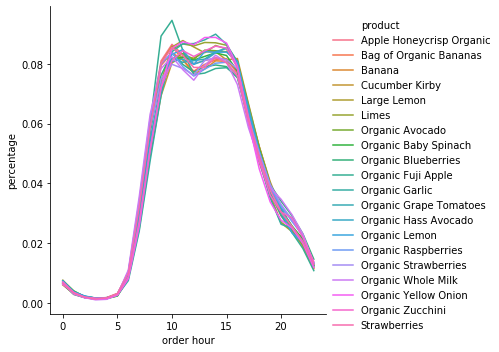

In [60]:
sns.relplot(x='order hour', y='percentage', kind='line', hue='product' , data=tidy)

In [0]:
sns.scatterplot(x=newdf[''])